### `Task` How dimensionality reduction using Principal Component Analysis (PCA) on the Wine Quality dataset contributes to improving the classification accuracy and efficiency of wine type.

Note : Use KNN for Classification.

Data Link :  [Wine Data](https://docs.google.com/spreadsheets/d/e/2PACX-1vQDVwxneOKOaJL13QMhkAhYrgWlH1tICY7RacUnj_lL8m9uUWaaUf3p7bScNyh_D2Rvt7nc1q11adSy/pub?gid=647503637&single=true&output=csv)

In [72]:
# Data Loading
import pandas as pd
wine_data_path = "https://docs.google.com/spreadsheets/d/e/2PACX-1vQDVwxneOKOaJL13QMhkAhYrgWlH1tICY7RacUnj_lL8m9uUWaaUf3p7bScNyh_D2Rvt7nc1q11adSy/pub?gid=647503637&single=true&output=csv"
wine = pd.read_csv(wine_data_path)
wine.head(1)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.001,3.0,0.45,8.8,6


In [50]:
"""from sklearn.preprocessing import LabelEncoder

# Label Encoding is better since only two values are there in type of wine column !(white->1, red->0)

column_name = 'type'

# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the data
wine[column_name] = label_encoder.fit_transform(wine[column_name])

# Replace the original column with the encoded data
print(wine)
"""

      type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0        1            7.0             0.270         0.36            20.7   
1        1            6.3             0.300         0.34             1.6   
2        1            8.1             0.280         0.40             6.9   
3        1            7.2             0.230         0.32             8.5   
4        1            7.2             0.230         0.32             8.5   
...    ...            ...               ...          ...             ...   
6492     0            6.2             0.600         0.08             2.0   
6493     0            5.9             0.550         0.10             2.2   
6494     0            6.3             0.510         0.13             2.3   
6495     0            5.9             0.645         0.12             2.0   
6496     0            6.0             0.310         0.47             3.6   

      chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0         

In [51]:
"""
# Null values to mean values offixed_acidity similarly for all missing value columns
mean_fixed_acidity = wine['fixed acidity'].mean()
wine = wine.fillna({'fixed acidity': mean_fixed_acidity})

volatile_acidity = wine['volatile acidity'].mean()
wine = wine.fillna({'volatile acidity': volatile_acidity})

citric_acid = wine['citric acid'].mean()
wine = wine.fillna({'citric acid': citric_acid})

residual_sugar = wine['residual sugar'].mean()
wine = wine.fillna({'residual sugar': residual_sugar})

chlorides = wine['chlorides'].mean()
wine = wine.fillna({'chlorides': chlorides})

pH = wine['pH'].mean()
wine = wine.fillna({'pH': pH})

sulphates = wine['sulphates'].mean()
wine = wine.fillna({'sulphates': sulphates})

"""

In [73]:
wine_data = pd.read_csv(wine_data_path)
print("Wine Data Shape :", wine_data.shape)
# Drop rows with missing values
wine_data = wine_data.dropna()

# Dropping Duplicates rows
wine_data.drop_duplicates(inplace=True)
print("Wine Data Shape (After Dropping-) :", wine_data.shape)


Wine Data Shape : (6497, 13)
Wine Data Shape (After Dropping-) : (5295, 13)


In [81]:
# Your Code goes Here
from sklearn.model_selection import train_test_split

X = wine_data.drop('type', axis=1)
y = wine_data['type']
# print(X)
# print(y)


In [82]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

wine_data.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
6,white,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6


In [83]:
# Check whether any values are missing still in dataset or not?
wine_data.isnull().sum(axis=0)


type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
"""
# One Hot Encode type of wine
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

column_name = 'type'
column_data = wine[[column_name]]
# print(column_data)
encoder = OneHotEncoder(sparse=False)
one_hot_encoded_data = encoder.fit_transform(column_data)
one_hot_encoded_df = pd.DataFrame(one_hot_encoded_data, columns=encoder.get_feature_names_out(['type']))
df = pd.concat([wine, one_hot_encoded_df], axis=1).drop(columns=['type'])

print(df.head())
# pd.get_dummies(wine, columns=['type'])
"""


In [84]:
from sklearn.preprocessing import StandardScaler

slr = StandardScaler()
X_train = slr.fit_transform(X_train)
X_test = slr.transform(X_test)


In [85]:
print(wine['type'].unique())

['white' 'red']


In [86]:
print(X_train.shape)
print(X_test.shape)

(3706, 12)
(1589, 12)


In [87]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [88]:
from sklearn.metrics import accuracy_score

y_pred = knn.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.9949653870358716


In [89]:
# Now we use optimum number of principle components and then try to measure accuracy_Score again!

from sklearn.decomposition import PCA
pca = PCA(n_components=None) #Initially we take all components means 0-12 features
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)




In [90]:
knn1 = KNeighborsClassifier()
knn1.fit(X_train_trf, y_train)


KNeighborsClassifier()

In [91]:
y_pred = knn1.predict(X_test_trf)
accuracy_score(y_test, y_pred)

0.9949653870358716

In [92]:
import numpy as np
import matplotlib.pyplot as plt

np.cumsum(pca.explained_variance_ratio_)

array([0.25063152, 0.47126178, 0.60991225, 0.7001505 , 0.77189789,
       0.82654649, 0.87166319, 0.91408493, 0.95332932, 0.97834847,
       0.99702316, 1.        ])

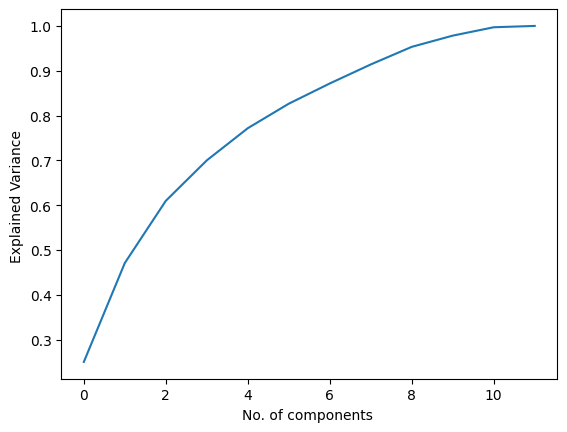

In [93]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("No. of components ")
plt.ylabel("Explained Variance ")
plt.show()

Number of components needed for 0.9 explained variance: 8


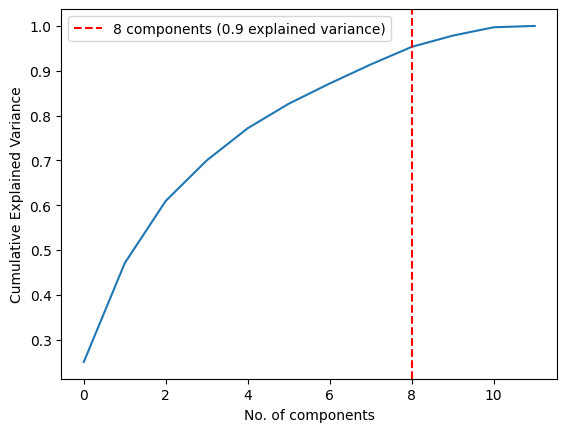

In [94]:

cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
components_needed = np.argmax(cumulative_variance_ratio >= 0.9) + 1

print("Number of components needed for 0.9 explained variance:", components_needed)

plt.plot(cumulative_variance_ratio)
plt.xlabel("No. of components")
plt.ylabel("Cumulative Explained Variance")
plt.axvline(x=components_needed, color='r', linestyle='--', label=f'{components_needed} components (0.9 explained variance)')
plt.legend()
plt.show()

In [113]:
pca_new = PCA(n_components=8)
X_train_trf = pca_new.fit_transform(X_train)
X_test_trf = pca_new.transform(X_test)

In [114]:
knn2 = KNeighborsClassifier()
knn2.fit(X_train_trf, y_train)



KNeighborsClassifier()

In [115]:
y_pred = knn2.predict(X_test_trf)
print(accuracy_score(y_test, y_pred))

0.9924480805538074
